<a href="https://colab.research.google.com/github/yepterence/Freshwater-management-KNet/blob/main/ML_freshwater_Data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
import os 
import sys
import pandas as pd 
import glob
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime as dt
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs


In [10]:
# PATH = '/content/drive/MyDrive/ColabNotebooks/ML_freshwater_management_project/data/Lake_Water_Level/'
PATH = os.getcwd() + '/data/'
files = os.listdir(PATH)
# get list of only csv files
csv_files = glob.glob(PATH+"*.csv")

# create a dictionary with key as the DF name and values as DataFrames 
df_collection = {}
csv_names = []
for i in csv_files:
    name = i[:-4]
    csv_names.append(name)
    
zip_object = zip(csv_names, csv_files)
for name, file in zip_object:
    df_collection[name] = pd.read_csv(file, low_memory=False)


In [11]:
full_df = pd.concat(df_collection.values())
full_df.head()

,Date (YYYYMMDD),Lake_name,Latitude,Longitude,Relaive_orbit,Lake water level (m)
0,20180512,Athabasca,59.365696,-107.680063,98,209.3384
1,20180512,Athabasca,59.362814,-107.682010,98,209.5665
2,20180512,Athabasca,59.359931,-107.683956,98,209.6700
3,20180512,Athabasca,59.357049,-107.685902,98,209.5169
4,20180512,Athabasca,59.354166,-107.687848,98,209.4275


In [12]:
full_df.columns = ['date','l_name','lat','long','rel_orb','water_level']
full_df.loc[:,'date'] = pd.to_datetime(full_df.loc[:,'date'], format = "%Y%m%d")
full_df['water_level'] = full_df.loc[:,'water_level'].round(2)
full_df.head()

,date,l_name,lat,long,rel_orb,water_level
0,2018-05-12,Athabasca,59.365696,-107.680063,98,209.34
1,2018-05-12,Athabasca,59.362814,-107.682010,98,209.57
2,2018-05-12,Athabasca,59.359931,-107.683956,98,209.67
3,2018-05-12,Athabasca,59.357049,-107.685902,98,209.52
4,2018-05-12,Athabasca,59.354166,-107.687848,98,209.43


In [13]:
print(f"Sentinel 3A,3B df shape: \n{full_df.shape}")
print("----------------")
print(full_df.info())
print("----------------")
print(full_df.dtypes)

Sentinel 3A,3B df shape: 
(662669, 6)
----------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 662669 entries, 0 to 353062
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         662669 non-null  datetime64[ns]
 1   l_name       662669 non-null  object        
 2   lat          662669 non-null  float64       
 3   long         662669 non-null  float64       
 4   rel_orb      662669 non-null  int64         
 5   water_level  662669 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 35.4+ MB
None
----------------
date           datetime64[ns]
l_name                 object
lat                   float64
long                  float64
rel_orb                 int64
water_level           float64
dtype: object


In [14]:
print(f"Null values in df: \n {full_df.isnull().sum()/ full_df.shape[0]} \n ----------------")
print(f"Value counts for: \n{full_df.value_counts()} \n----------------")
print(f"Describe data: \n {full_df.describe()} \n --------------")

Null values in df: 
 date           0.0
l_name         0.0
lat            0.0
long           0.0
rel_orb        0.0
water_level    0.0
dtype: float64 
 ----------------
Value counts for: 
date        l_name       lat        long         rel_orb  water_level
2016-04-01  Great Slave  61.028141  -116.662292  284      155.09         1
2019-08-29  Winnipeg     51.633749  -97.256979   317      216.79         1
                         52.055566  -97.457515   317      217.11         1
                         52.058416  -97.458881   317      217.11         1
                         52.061264  -97.460247   317      217.13         1
                                                                        ..
2018-06-25  Great Slave  61.099777  -114.960883  346      156.89         1
                         61.102576  -114.962968  346      156.73         1
                         61.105373  -114.965053  346      156.73         1
                         61.108172  -114.967139  346      156.81   

In [15]:
dataset_lakes=full_df.l_name.unique()
print(dataset_lakes)

['Athabasca' 'Cedar' 'Great Slave' 'Kiskittogisu' 'Lesser Slave' 'Nonacho'
 'Teslin' 'Winnipeg' 'Woods']


In [16]:
# create df for each lake
for l in dataset_lakes:
  f_var = l.lower() + "_df"
  locals()[f_var] = full_df[full_df['l_name']==l]


In [17]:
athabasca_df['no_year'] = athabasca_df['date'].map(lambda x: x.strftime('%m-%d'))
athabasca_df.head()

/tmp/ipykernel_20452/2361754549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athabasca_df['no_year'] = athabasca_df['date'].map(lambda x: x.strftime('%m-%d'))


,date,l_name,lat,long,rel_orb,water_level,no_year
0,2018-05-12,Athabasca,59.365696,-107.680063,98,209.34,05-12
1,2018-05-12,Athabasca,59.362814,-107.682010,98,209.57,05-12
2,2018-05-12,Athabasca,59.359931,-107.683956,98,209.67,05-12
3,2018-05-12,Athabasca,59.357049,-107.685902,98,209.52,05-12
4,2018-05-12,Athabasca,59.354166,-107.687848,98,209.43,05-12


In [ ]:
april_lake_level_atha = athabasca_df[athabasca_df['no_year']=='04-03']
april_lake_level_atha.rel_orb.unique()


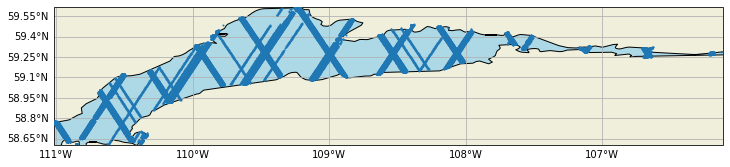

In [20]:
extent = [athabasca_df['long'].min(), athabasca_df['long'].max(), athabasca_df['lat'].min(), athabasca_df['lat'].max()]
central_long = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

lake_features = cfeature.NaturalEarthFeature('physical', 'lakes', '10m')

fig = plt.figure(figsize=(12,10))
ax=fig.add_subplot(111, projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.add_feature(cartopy.feature.LAND, edgecolor = 'green')
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(lake_features,facecolor='lightblue',edgecolor='black')

ax.scatter(
    x=np.array(athabasca_df['long']),
    y=np.array(athabasca_df['lat']),
    zorder=10,
    s=1
)

g1 = ax.gridlines(draw_labels=True)
g1.top_labels = False
g1.right_labels = False
plt.show()

In [ ]:
# fig = px.histogram(full_df, x='water_level', 
#                    color='l_name', 
#                    title='Distribution of water levels for select western Canadian lakes, 2016-2021')
# # fig.show()
# fig.write_html('/content/drive/MyDrive/ColabNotebooks/ML_freshwater_management_project/reports/water_level.html')

In [ ]:
scl = [0,"rgb(150,0,90)"],[0.125,"rgb(0, 0, 200)"],[0.25,"rgb(0, 25, 255)"],\
[0.375,"rgb(0, 152, 255)"],[0.5,"rgb(44, 255, 150)"],[0.625,"rgb(151, 255, 0)"],\
[0.75,"rgb(255, 234, 0)"],[0.875,"rgb(255, 111, 0)"],[1,"rgb(255, 0, 0)"]

fig = go.Figure(data=go.Scattergeo(
    lat = full_df['lat'],
    lon = full_df['long'],
    text =full_df['water_level'].astype(str) + ' inches',
    marker = dict(
        color = full_df['water_level'],
        colorscale = scl,
        reversescale = True,
        opacity = 0.7,
        size = 2,
        colorbar = dict(
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            showticksuffix = "last",
            dtick = 0.1
        )
    )
))

fig.update_layout(
    geo = dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title='Lake water levels - Western Canada, 2016-2021',
)

plotly.offline.plot('/content/drive/MyDrive/ColabNotebooks/ML_freshwater_management_project/reports/water_level_geo.html')